In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 'normal' if x=='normal' else 'attack')
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [5]:
corr_df = df[df.select_dtypes(include=['int64','float64']).drop('numoutboundcmds',axis=1).columns].corr()

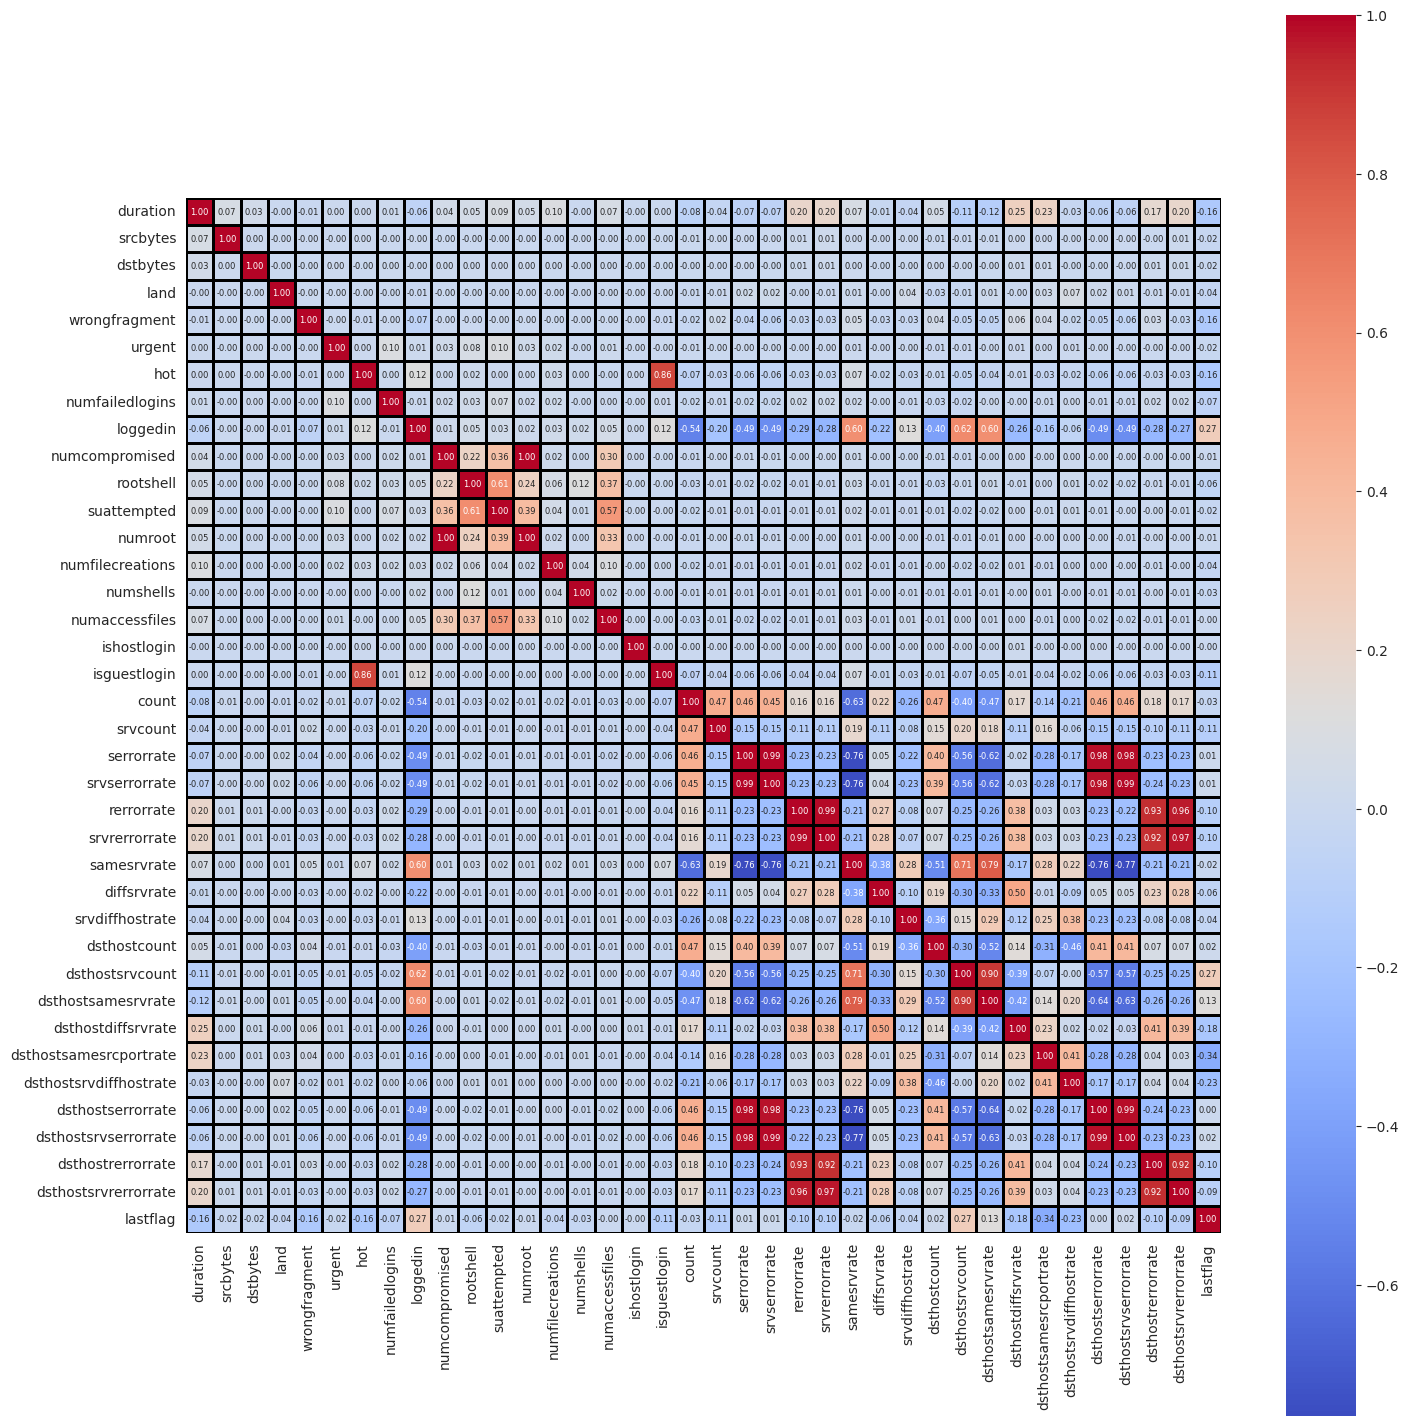

In [6]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm',
            annot_kws={'size': 6},  # Font size for the annotation
            #cbar_kws={"shrink": 0.8},  # Shrink color bar to fit the figure
            linewidths=1,            # Add separation lines between cells
            linecolor='black',         # Color of the grid lines
            xticklabels=corr_df.columns,  # Keep column names as they are
            yticklabels=corr_df.columns,  # Keep row names as they are
            square=True)  # Makes the heatmap square (grid lines align)
plt.tight_layout()

In [7]:
scan = set(['ipsweep', 'portsweep', 'nmap', 'satan'])
dos = set(['neptune', 'smurf', 'pod', 'teardrop', 'land'])
access = set(['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezclient', 'warezmaster'])
exploit = set(['buffer_overflow', 'loadmodule', 'rootkit', 'perl'])
backdoor = set(['back','spy'])

In [8]:
df['attack_category'] = None

for i in range(len(df)):
  attk = df.loc[i,'attack']
  if attk in scan:
    df.loc[i,'attack_category'] = 'scan'
  elif attk in dos:
    df.loc[i,'attack_category'] = 'dos'
  elif attk in access:
    df.loc[i,'attack_category'] = 'access'
  elif attk in exploit:
    df.loc[i,'attack_category'] = 'exploit'
  elif attk in backdoor:
    df.loc[i,'attack_category'] = 'backdoor'
  else:
    df.loc[i,'attack_category'] = 'normal'

In [9]:
# Host count of flags
df['dsthostserror'] = df['dsthostcount']*df['dsthostserrorrate']
df['dsthostrerror'] = df['dsthostcount']*df['dsthostrerrorrate']

# Host srv count of flags
df['dsthostsrvserror'] = df['dsthostsrvcount']*df['dsthostsrvrerrorrate']
df['dsthostsrvrerror'] = df['dsthostsrvcount']*df['dsthostsrvserrorrate']

df['dsthostsamesrv'] = df['dsthostsrvcount']*df['dsthostsamesrvrate']
df['dsthostdiffsrv'] = df['dsthostsrvcount']*df['dsthostdiffsrvrate']

df['dsthostsame'] = df['dsthostsrvcount']*df['dsthostsamesrcportrate']
df['dsthostdiff'] = df['dsthostsrvcount']*df['dsthostsrvdiffhostrate']

# Host count of flags
df['serror'] = df['count']*df['serrorrate']
df['rerror'] = df['count']*df['rerrorrate']

# Host srv count of flags
df['srvserror'] = df['srvcount']*df['srvrerrorrate']
df['srvrerror'] = df['srvcount']*df['srvserrorrate']

df['samesrv'] = df['count']*df['samesrvrate']
df['diffsrv'] = df['count']*df['diffsrvrate']

In [10]:
df[df['dsthostdiffsrvrate'] == df['dsthostsrvdiffhostrate']].shape

(17938, 59)

In [11]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack,attack_category,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,dsthostsame,dsthostdiff,serror,rerror,srvserror,srvrerror,samesrv,diffsrv
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal,normal,0.0,7.5,0.00,0.00,4.25,0.75,4.25,0.0,0.0,0.0,0.0,0.0,2.00,0.00
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal,normal,0.0,0.0,0.00,0.00,0.00,0.60,0.88,0.0,0.0,0.0,0.0,0.0,1.04,1.95
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,attack,dos,255.0,0.0,0.00,26.00,2.60,1.30,0.00,0.0,123.0,0.0,0.0,6.0,6.15,8.61
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal,normal,0.9,0.0,2.55,2.55,255.00,0.00,7.65,10.2,1.0,0.0,0.0,1.0,5.00,0.00
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal,normal,0.0,0.0,0.00,0.00,255.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,30.00,0.00


In [12]:
corr_df[(corr_df > 0.7) & (corr_df != 1)].dropna(axis=0, how='all').dropna(axis=1, how='all')

,hot,numcompromised,numroot,isguestlogin,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,dsthostsrvcount,dsthostsamesrvrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate
hot,NaN,NaN,NaN,0.860288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numcompromised,NaN,NaN,0.998833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numroot,NaN,0.998833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isguestlogin,0.860288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
serrorrate,NaN,NaN,NaN,NaN,NaN,0.993289,NaN,NaN,NaN,NaN,NaN,0.979373,0.981139,NaN,NaN
srvserrorrate,NaN,NaN,NaN,NaN,0.993289,NaN,NaN,NaN,NaN,NaN,NaN,0.977596,0.986252,NaN,NaN
rerrorrate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.989008,NaN,NaN,NaN,NaN,NaN,0.926749,0.964449
srvrerrorrate,NaN,NaN,NaN,NaN,NaN,NaN,0.989008,NaN,NaN,NaN,NaN,NaN,NaN,0.917822,0.970208
samesrvrate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.705410,0.788978,NaN,NaN,NaN,NaN
dsthostsrvcount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.705410,NaN,0.896663,NaN,NaN,NaN,NaN


<Axes: xlabel='srvcount'>

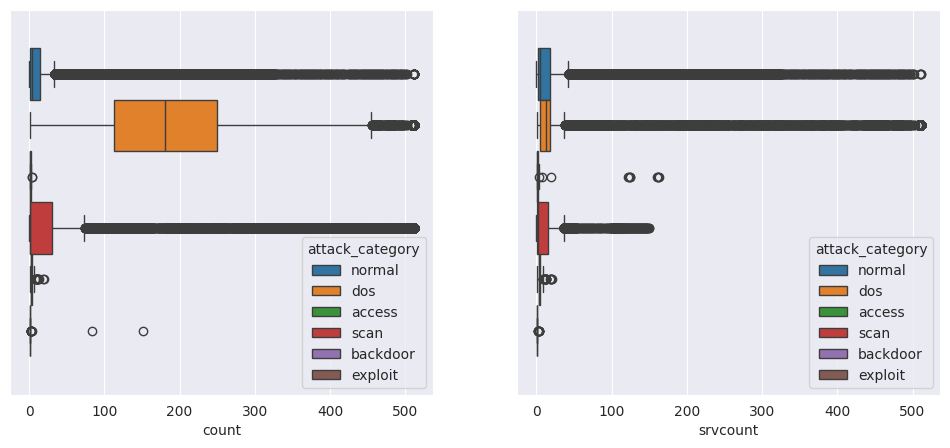

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='count',hue='attack_category')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='srvcount',hue='attack_category')

<Axes: xlabel='rerror'>

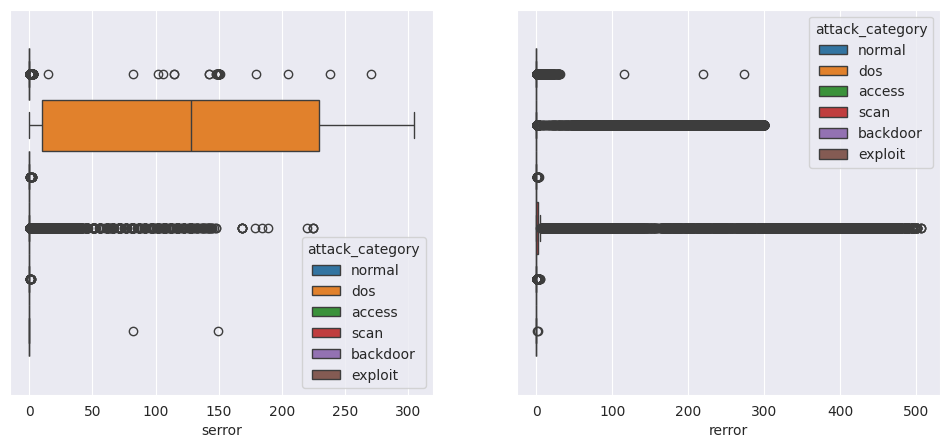

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='serror',hue='attack_category')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='rerror',hue='attack_category')

<Axes: xlabel='srvrerror'>

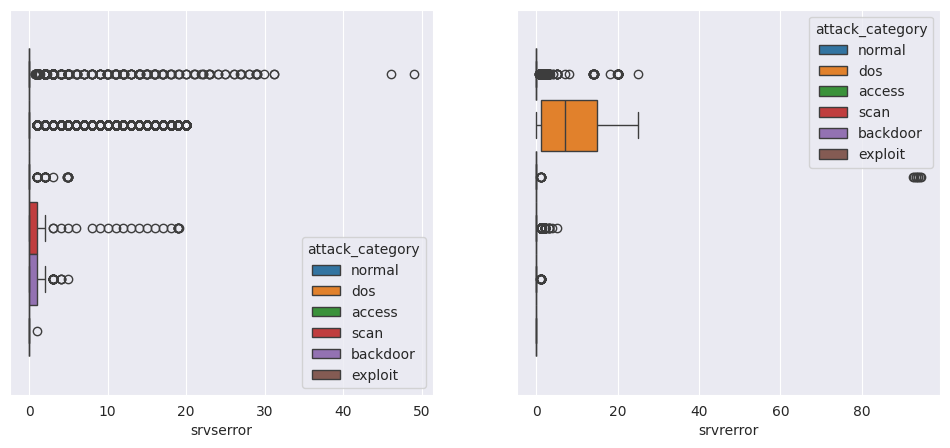

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='srvserror',hue='attack_category')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='srvrerror',hue='attack_category')

<Axes: xlabel='diffsrv'>

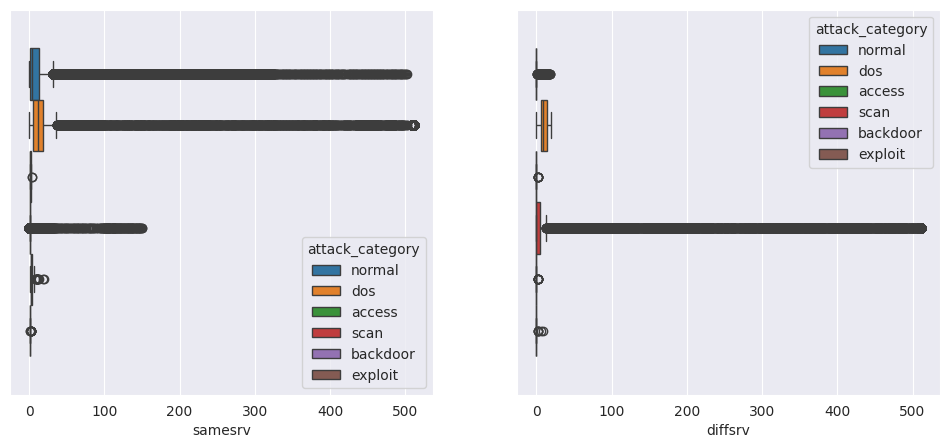

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='samesrv',hue='attack_category')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='diffsrv',hue='attack_category')

<Axes: xlabel='dsthostsrvcount'>

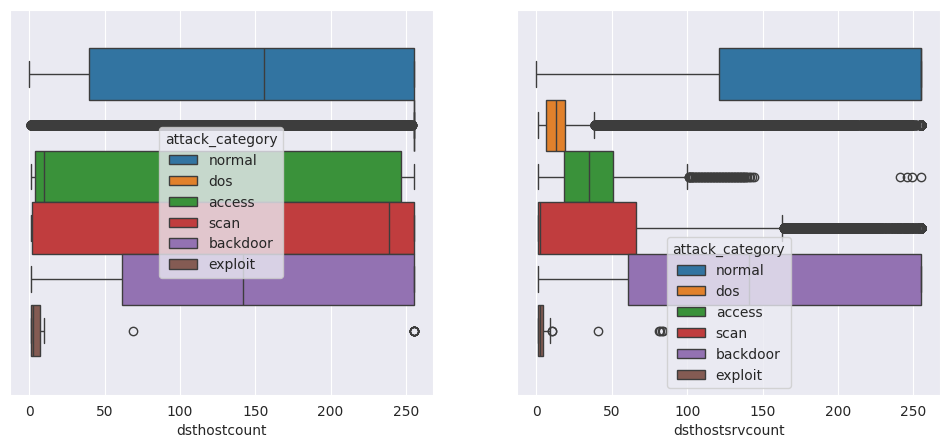

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='dsthostcount',hue='attack_category')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='dsthostsrvcount',hue='attack_category')

<Axes: xlabel='dsthostrerror'>

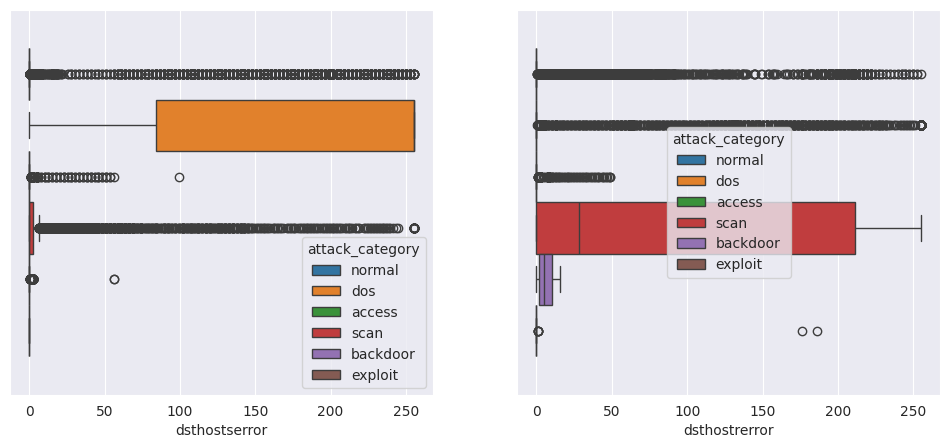

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='dsthostserror',hue='attack_category')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='dsthostrerror',hue='attack_category')

<Axes: xlabel='dsthostsrvrerror'>

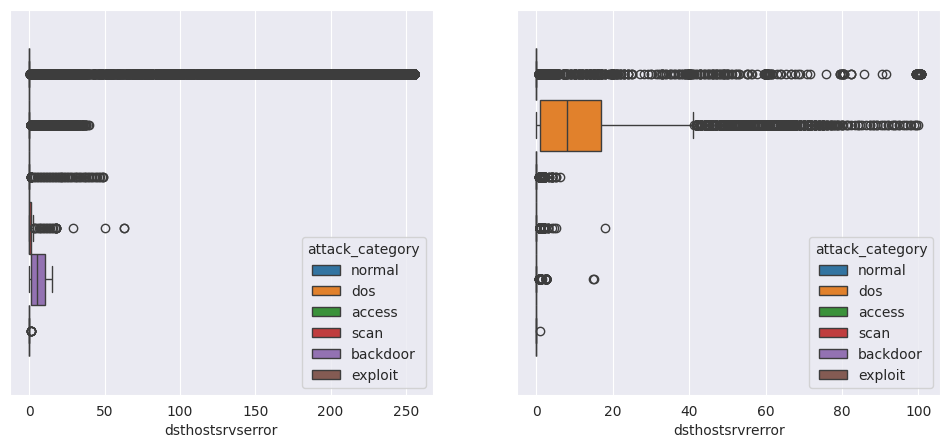

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='dsthostsrvserror',hue='attack_category')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='dsthostsrvrerror',hue='attack_category')

<Axes: xlabel='dsthostdiffsrv'>

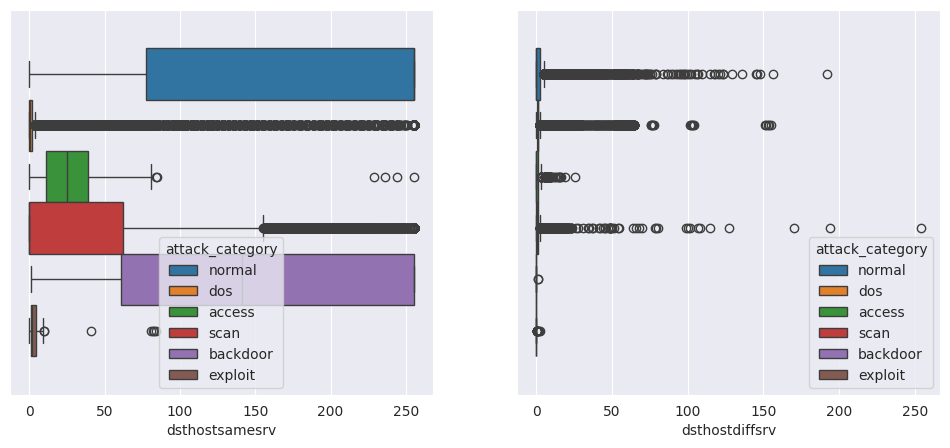

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='dsthostsamesrv',hue='attack_category')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='dsthostdiffsrv',hue='attack_category')

<Axes: xlabel='dsthostdiff'>

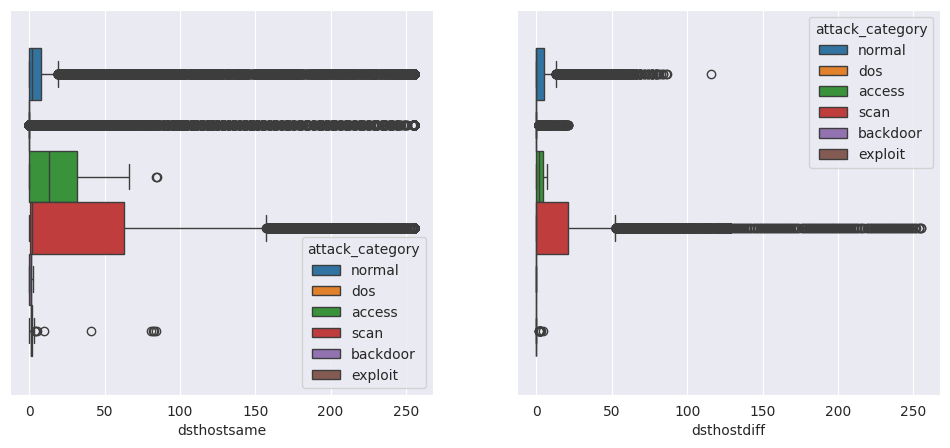

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='dsthostsame',hue='attack_category')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='dsthostdiff',hue='attack_category')

In [22]:
df[df['count'] > df['dsthostcount']]['is_attack'].value_counts()

,count
is_attack,
attack,12643
normal,1179


In [29]:
corr_df[(corr_df > 0.7) & (corr_df != 1)].dropna(axis=0, how='all').dropna(axis=1, how='all')

,hot,numcompromised,numroot,isguestlogin,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,dsthostsrvcount,dsthostsamesrvrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate
hot,NaN,NaN,NaN,0.860288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numcompromised,NaN,NaN,0.998833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numroot,NaN,0.998833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isguestlogin,0.860288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
serrorrate,NaN,NaN,NaN,NaN,NaN,0.993289,NaN,NaN,NaN,NaN,NaN,0.979373,0.981139,NaN,NaN
srvserrorrate,NaN,NaN,NaN,NaN,0.993289,NaN,NaN,NaN,NaN,NaN,NaN,0.977596,0.986252,NaN,NaN
rerrorrate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.989008,NaN,NaN,NaN,NaN,NaN,0.926749,0.964449
srvrerrorrate,NaN,NaN,NaN,NaN,NaN,NaN,0.989008,NaN,NaN,NaN,NaN,NaN,NaN,0.917822,0.970208
samesrvrate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.705410,0.788978,NaN,NaN,NaN,NaN
dsthostsrvcount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.705410,NaN,0.896663,NaN,NaN,NaN,NaN


In [32]:
corr_df[(corr_df < -0.7) & (corr_df != 1) & (corr_df < 0)].dropna(axis=0, how='all').dropna(axis=1, how='all')

,serrorrate,srvserrorrate,samesrvrate,dsthostserrorrate,dsthostsrvserrorrate
serrorrate,NaN,NaN,-0.761888,NaN,NaN
srvserrorrate,NaN,NaN,-0.756784,NaN,NaN
samesrvrate,-0.761888,-0.756784,NaN,-0.760648,-0.765322
dsthostserrorrate,NaN,NaN,-0.760648,NaN,NaN
dsthostsrvserrorrate,NaN,NaN,-0.765322,NaN,NaN


In [45]:
namecol = pd.DataFrame(df.columns)
namecol[namecol[0].str.contains('serrorrate')]

,0
24,serrorrate
25,srvserrorrate
37,dsthostserrorrate
38,dsthostsrvserrorrate


In [52]:
df.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes', 'land',
       'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin', 'numcompromised',
       'rootshell', 'suattempted', 'numroot', 'numfilecreations', 'numshells', 'numaccessfiles',
       'numoutboundcmds', 'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate', 'diffsrvrate',
       'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate',
       'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate',
       'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate',
       'attack', 'lastflag', 'is_attack', 'attack_category', 'dsthostserror', 'dsthostrerror',
       'dsthostsrvserror', 'dsthostsrvrerror', 'dsthostsamesrv', 'dsthostdiffsrv', 'dsthostsame',
       'dsthostdiff', 'serror', 'rerror', 'srvserror', 'srvrerror', 'samesrv', 'diffsrv'],
     

<Axes: xlabel='serrorrate', ylabel='dsthostsrvserrorrate'>

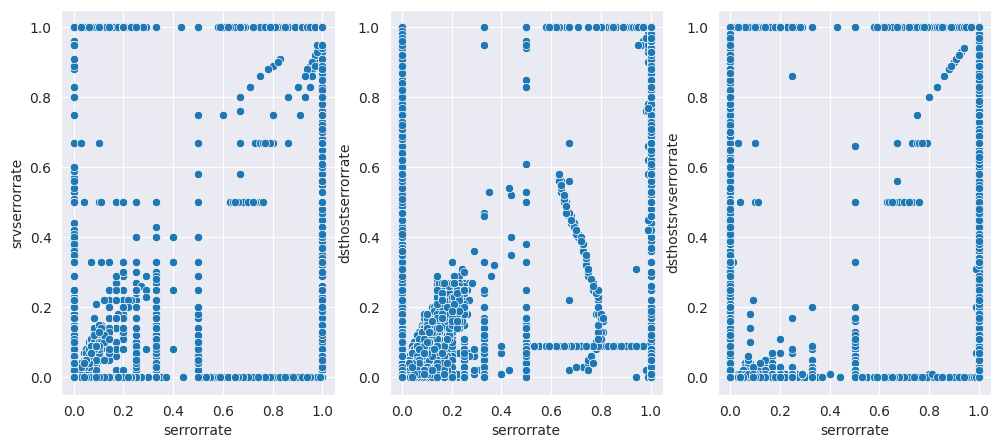

In [50]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.scatterplot(data=df,x='serrorrate',y='srvserrorrate')
plt.subplot(1,3,2)
sns.scatterplot(data=df,x='serrorrate',y='dsthostserrorrate')
plt.subplot(1,3,3)
sns.scatterplot(data=df,x='serrorrate',y='dsthostsrvserrorrate')

<Axes: xlabel='srvserrorrate', ylabel='dsthostsrvserrorrate'>

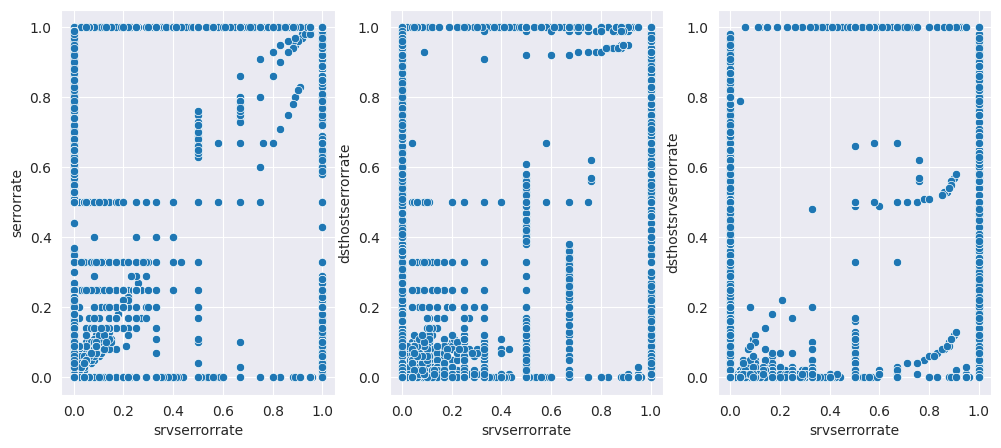

In [51]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.scatterplot(data=df,x='srvserrorrate',y='serrorrate')
plt.subplot(1,3,2)
sns.scatterplot(data=df,x='srvserrorrate',y='dsthostserrorrate')
plt.subplot(1,3,3)
sns.scatterplot(data=df,x='srvserrorrate',y='dsthostsrvserrorrate')

In [115]:
df[df['numroot'] == df['numcompromised']].shape

(124247, 59)

<Axes: xlabel='numroot', ylabel='numcompromised'>

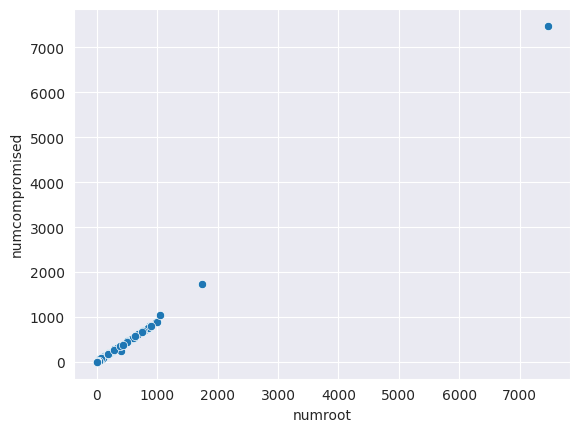

In [113]:
sns.scatterplot(data=df,x='numroot',y='numcompromised')

In [85]:
df.columns[-14:]

Index(['dsthostserror', 'dsthostrerror', 'dsthostsrvserror', 'dsthostsrvrerror', 'dsthostsamesrv',
       'dsthostdiffsrv', 'dsthostsame', 'dsthostdiff', 'serror', 'rerror', 'srvserror',
       'srvrerror', 'samesrv', 'diffsrv'],
      dtype='object')

In [119]:
df1 = df.copy()
df1 = df1[df1.select_dtypes(include=['int64','float64']).columns]
df1.drop(['numroot','dsthostsrvcount'],axis=1,inplace=True)

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = df1.columns
vif_data["VIF"] = [variance_inflation_factor(df1.values, i)
                   for i in range(df1.shape[1])]

In [121]:
vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
18,count,483.895729
45,serror,237.576087
21,srvserrorrate,180.120825
49,samesrv,160.324307
20,serrorrate,150.334600
46,rerror,107.543835
32,dsthostserrorrate,103.087442
33,dsthostsrvserrorrate,97.079901
23,srvrerrorrate,79.601706
22,rerrorrate,73.830059
